**Project Title - Campus Placement Prediction**

**Column Details**

sl_no- Serial no  
gender - Gender
ssc_p - SSC Percenatge           
ssc_b - SSC Board           
hsc_p - HSC Percenatge            
hsc_b - HSC Board               
hsc_s - HSC Specialization             
degree_p - Degree Percentage          
degree_t - Degree Specialization          
workex  - Work Experience                
specialisation -  Specialisation (Major)
mba_p - MBA Percentage            
status - Placement Status             
salary - Package after placement.      



In [2]:
import numpy as np #Numerical Python -Used for mathematical tasks (Statistics)
import pandas as pd # Used for data analysis,cleaning and transformation.Examples - read , head , reshape etc
import seaborn as sns  # Used to plot graphs. Ex. Line Plots,Bar Plots,Histogram Plots,Box and Whisker Plots,Scatter Plots
import matplotlib.pyplot as plt # Used for either creating simple graphs or data exploration
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
placement = pd.read_csv('/content/PlacementDataset.csv')

In [4]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
placement.shape

(215, 15)

In [6]:
placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
placement.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**DATA CLEANING**

**Handling missing values**


In [9]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
 placement['salary'].fillna(value= 0 , inplace=True) # inplace will keep the changes constant.

In [11]:
placement.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
# From above we can see that all the null values are removed from salary column.

**Droping unnecessary columns**



**Columns such as Serial no., Boards are of no use as they don't play any important role in the data prediction/accuracy. So we will drop these unnecessary columns **

In [13]:
placement.drop(['sl_no','ssc_b','hsc_b'],axis=1, inplace=True)
placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


 **Data Visualizations**



Text(0.5, 1.0, 'Employement percent')

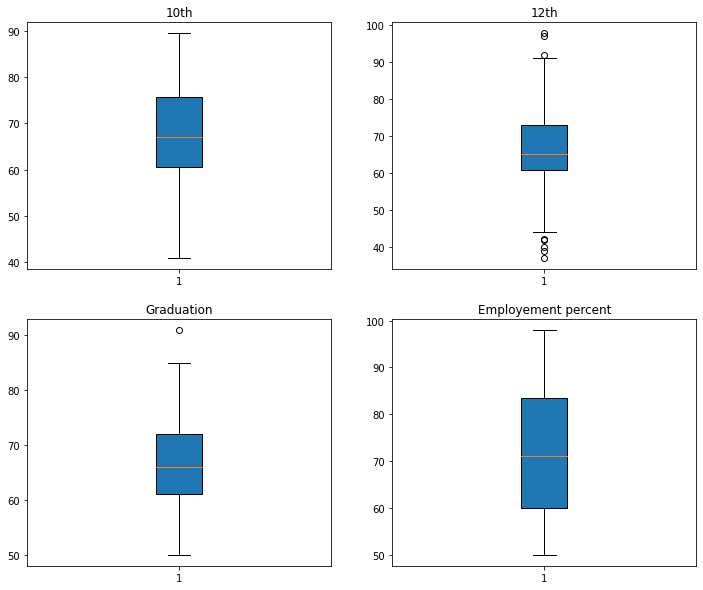

In [14]:
plt.figure(figsize=(12,10))

box= plt.subplot(221)
plt.boxplot(placement['ssc_p'], patch_artist= True)
box.set_title('10th')

box= plt.subplot(222)
plt.boxplot(placement['hsc_p'], patch_artist= True)
box.set_title('12th')

box= plt.subplot(223)
plt.boxplot(placement['degree_p'], patch_artist= True)
box.set_title('Graduation')

box= plt.subplot(224)
plt.boxplot(placement['etest_p'], patch_artist= True)
box.set_title('Employement percent')

**From the above observation there are no outliers in other columns as compared to HSC column. So now we will handle outliers.**

In [15]:
Q1 = placement['hsc_p'].quantile(0.25)
Q3 = placement['hsc_p'].quantile(0.75)
IQR =Q3-Q1 

outl = (placement['hsc_p'] >= Q1 - 1.5 * IQR) & (placement['hsc_p']<= Q3 + 1.5*IQR)
out = placement.loc[outl]


Text(0.5, 1.0, '12th')

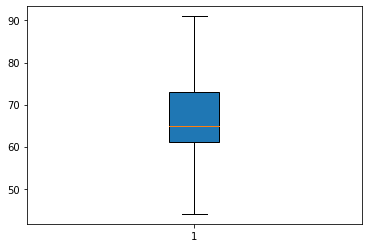

In [16]:
plt.boxplot(out['hsc_p'], patch_artist= True)
box.set_title('12th')

**Now we can see that there are no outliers in HSC column. **

**In order to get more precised data we will use count plot from seaborn library.*The countplot is majorly used for showing the observational count in different category. It is same as bar plot.**

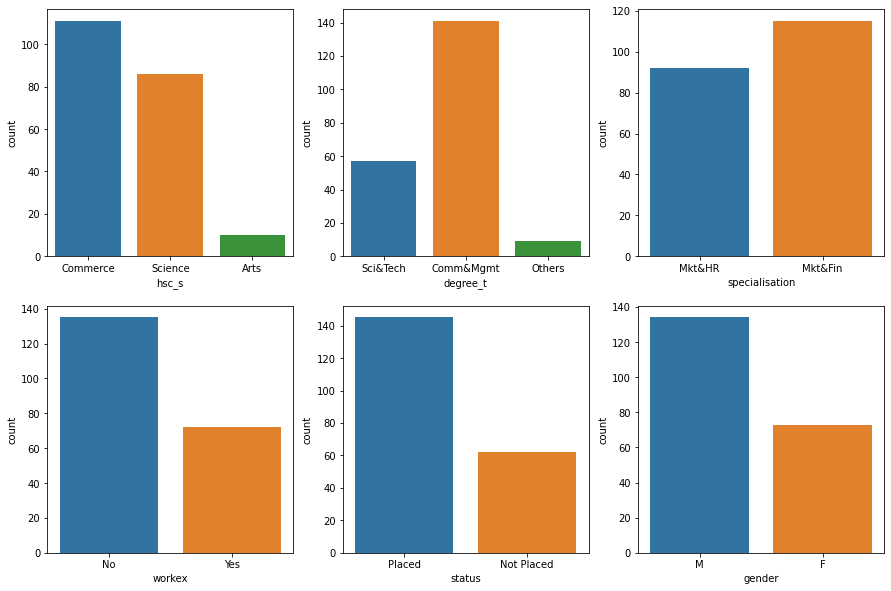

In [17]:
plt.figure(figsize=(15,10))

count= plt.subplot(231)
sns.countplot(x= 'hsc_s', data = out)

count= plt.subplot(232)
sns.countplot(x= 'degree_t', data = out)

count= plt.subplot(233)
sns.countplot(x= 'specialisation', data = out)

count= plt.subplot(234)
sns.countplot(x= 'workex', data = out)

count= plt.subplot(235)
sns.countplot(x= 'status', data = out)

count= plt.subplot(236)
sns.countplot(x= 'gender', data = out)


**Observations**:
hsc_t(12th major)--> We can see that hightest no. of students placed belong to Science as their major followed by Commerce and Arts.
degree_t(UG major)--> We can see that hightest no. of students placed belong to Sci & Tech as their major followed by Comm & Mgmt and Others.
workex-->The no. of students with no work experience(Freshers) is more as compred to students with exp.
status--> We can see that the no. students who are placed is more than the no. of students not placed.
Gender--> More no. of males are placed as compared to females. 

**Distplot for distribution of salary of placed and not placed people** **Generally used for distribution of a numerical data sample**

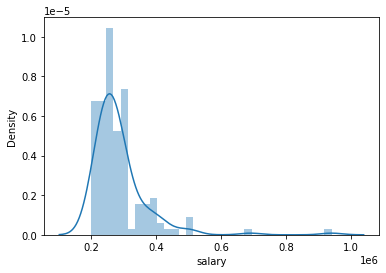

In [18]:
placed = out[out.salary!= 0]
sns.distplot(placed['salary'])

**From the above graph we can see that maximun placed people are earning their salary between 2-4 lakhs.**

**Encoding**

**Converting Categorical data using Label Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder

cols = ['gender','workex','specialisation','status']
le= LabelEncoder()
for i in cols:
  out[i]= le.fit_transform(out[i])


In [20]:
out.head()


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


**Here we can observe that all the categorical data from given columns is converted into 0's and 1's**

In [21]:
#from sklearn.preprocessing import OneHotEncoder
#cols=['hsc_s','degree_t']
#ohe = OneHotEncoder()
#for i in cols:
#  out[i]= le.fit_transform(out[i])
#out.head()

In [22]:
dummy_hsc_s = pd.get_dummies(out['hsc_s'], prefix = 'dummy')
dummy_degree_t = pd.get_dummies(out['degree_t'], prefix = 'dummy')

placement_coded = pd.concat([out , dummy_hsc_s , dummy_degree_t],axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [23]:
x= placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [24]:
x
y


0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 207, dtype: int64

**Dividing Data into Training and Testing Model**

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)


**Logistic Regression to mark the probabilty of the model.(Placed or not Placed). It Predicts in 0's & 1's or yes or no**

In [26]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred,normalize=True)

0.8095238095238095

**We will use Decision tree classifier to perfrom the tests on features of dataset.We have used gini for binary splits**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion= 'gini',max_depth=3)
dt.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
accuracy_score(y_test,y_pred,normalize=True)

0.7380952380952381

**Now we will use Random Forest Classifier to improve the performance of the model.**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred = rfc.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
accuracy_score(y_test,y_pred,normalize=True)

0.8095238095238095

**From the above observations Logistic Regression and Random Forest Classifier both are equally fit.**